**TABLE OF CONTENTS**

1. Introduction
2. Importing Libraries
3. Data Preparation
4. Data cleaning
5. Analysis
6. Visualization
7. Conclusion

**1. Introduction**

1.1 About dataset

Two datasets, SydneyHousePrices and Sydney_suburbs, were used in this project

- Sydney housing price

Approximately 0.20 million property sales occurred between 2000 and 2019, based on data scraped from realestate.com.au

**Features**
  - Date      : selling date 
  - Id        : transaction id 
  - suburb    : suburb of property 
  - postalCode: postal code 
  - sellPrice : selling price 
  - bed       : number of bedrooms 
  - bath      : number of bathrooms 
  - car       : number of car spaces 
  - propType  : property type 

  **Sydney suburb co-ordinates**

  **Features**

  - sururb: suburb name 
  - Latitude 
  - Longitude 

## **Project**

- Objective:  
To analyze housing trends in Sydney over the past 10 years, focusing on transaction volume, selling prices, property features, and location.  
Based on the analysis, the goal is to provide buyers with insights into the best time of year to purchase a home and identify suburbs that align with their budget and preferences for a dream home.

**Import Libraries**

In [1]:
import math
import numpy as np   # mathermatical calculations (linear algebra)
import pandas as pd  # data preprocessing

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Dealing with warning message
import warnings
warnings.filterwarnings('ignore')

## 🧰 Data Preparation

At this stage, the dataset is loaded, and an **initial exploration** of its features is performed to understand the structure and contents.

In [2]:
# Copying the original datasets
housing_price = pd.read_csv(r'C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\SydneyHouse\SydneyHousePrices.csv')
suburb = pd.read_csv(r'C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\SydneyHouse\sydney_suburbs.csv')

df = housing_price.copy()
df_suburb = suburb.copy()

# Displaying first five rows of the Sydney housing price dataset
print("First five rows of the Sydney housing price dataset:")
display(df.head())

# Displaying first five rows of the Sydney suburb dataset
print("First five rows of the Sydney suburb dataset:")
display(df_suburb.head())

First five rows of the Sydney housing price dataset:


,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


First five rows of the Sydney suburb dataset:


,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111


In [3]:
# Summary of the Sydney housing price dataset:
print(f" Number of data points: {df.shape[0]:,d}\n Number of features: {df.shape[1]:10,d}\n")
display(df.info())

# Summary of the Sydney suburb dataset:
print(f" Number of data points in suburb: {df_suburb.shape[0]:,d}\n Number of features in suburb: {df_suburb.shape[1]:6,d}\n")
display(df_suburb.info())

 Number of data points: 199,504
 Number of features:          9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


None

 Number of data points in suburb: 680
 Number of features in suburb:      3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Suburb     680 non-null    object 
 1   Latitude   678 non-null    float64
 2   Longitude  678 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.1+ KB


None

In [4]:
# Statistical Summary of numerical columns of the Sydney housing price dataset:
display(df.describe().T)
# Statistical Summary of numerical columns of the Sydney suburb dataset:
display(df_suburb.describe().T)

,count,mean,std,min,25%,50%,75%,max
Id,199504.0,9.975250e+04,5.759199e+04,1.0,49876.75,99752.5,149628.25,1.995040e+05
postalCode,199504.0,2.196379e+03,1.930535e+02,2000.0,2082.00,2144.0,2211.00,4.878000e+03
sellPrice,199504.0,1.269776e+06,6.948239e+06,1.0,720000.00,985000.0,1475000.00,2.147484e+09
bed,199350.0,3.516479e+00,1.066555e+00,1.0,3.00,3.0,4.00,9.900000e+01
bath,199504.0,1.890669e+00,9.260006e-01,1.0,1.00,2.0,2.00,9.900000e+01
car,181353.0,1.936224e+00,1.060237e+00,1.0,1.00,2.0,2.00,4.100000e+01


,count,mean,std,min,25%,50%,75%,max
Latitude,678.0,-33.839454,0.137951,-34.148333,-33.931518,-33.855121,-33.751268,-33.385278
Longitude,678.0,151.029482,0.173779,150.640977,150.884444,151.065779,151.168413,151.330945


In [5]:
# number of missing (null) values in each column in Sydney housing price dataset
df.isnull().sum()

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [6]:
# number of missing (null) values in each column in Sydney suburb dataset
df_suburb.isnull().sum()

Suburb       0
Latitude     2
Longitude    2
dtype: int64

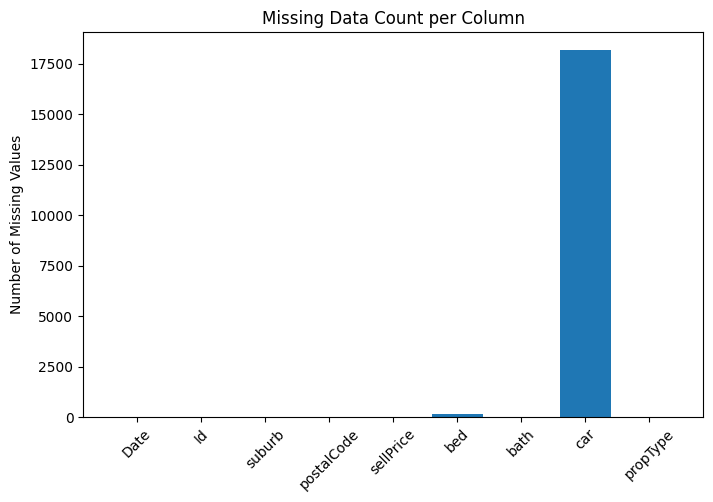

In [7]:
# Visualizing missing values
missing_counts = df.isnull().sum()

plt.figure(figsize=(8,5))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.title('Missing Data Count per Column')
plt.show()

In [8]:
# Check for duplicate rows in your DataFrame
df[df.duplicated()]

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType


In [9]:
df_suburb[df_suburb.duplicated()]

,Suburb,Latitude,Longitude


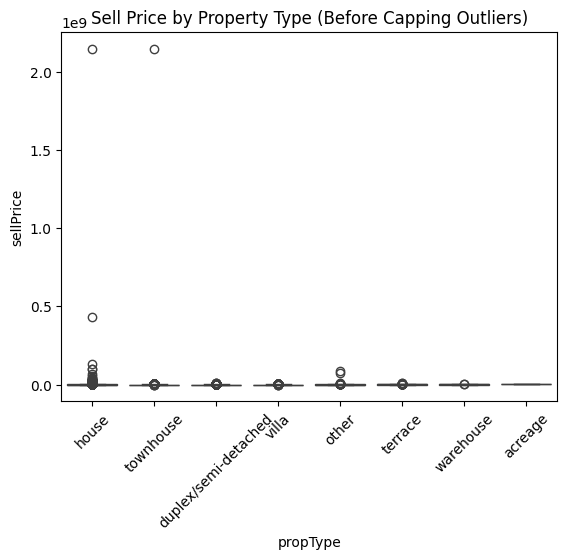

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='propType', y='sellPrice', data=df)
plt.xticks(rotation=45)
plt.title('Sell Price by Property Type (Before Capping Outliers)')
plt.show()

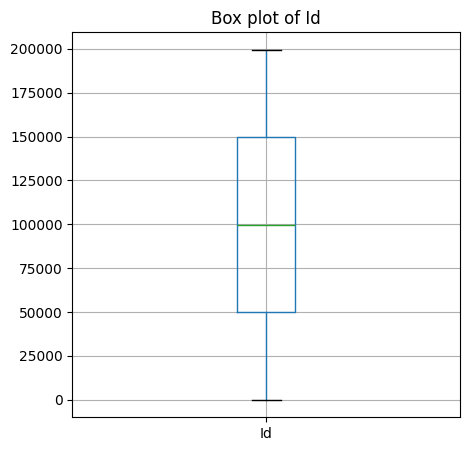

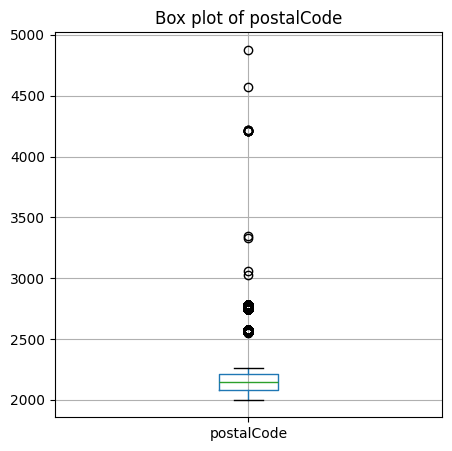

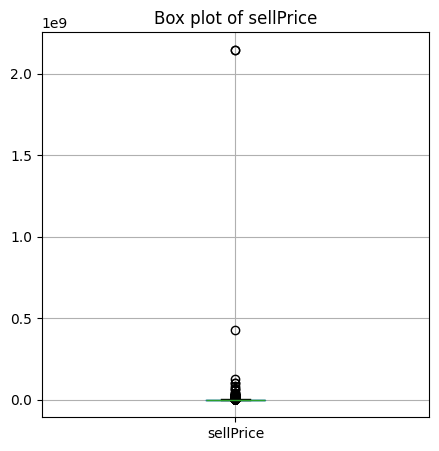

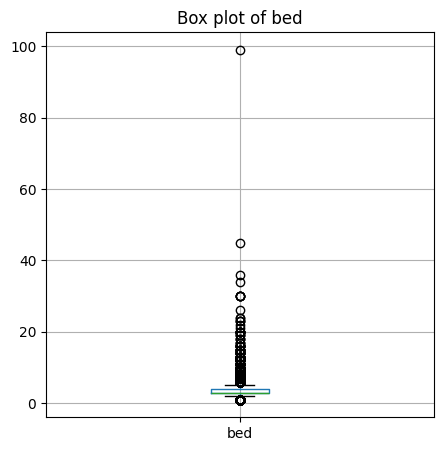

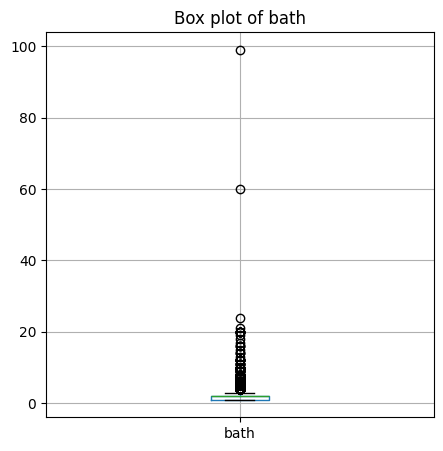

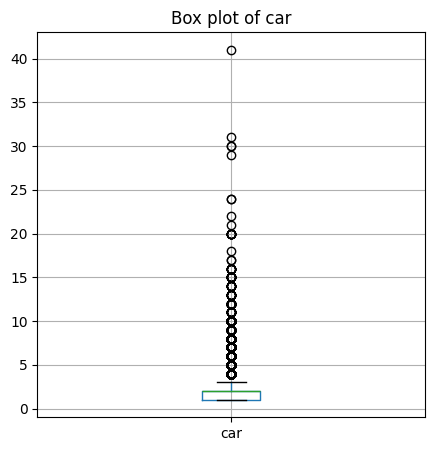

In [11]:
num_col=df.select_dtypes(exclude='object')

for col in num_col.columns:
    plt.figure(figsize=(5,5))
    df.boxplot(column=col)
    plt.title(f'Box plot of {col}')
    plt.show()

**Findings**

- Approximately 0.20 million records with 9 features in the dataset.
- Incorrect data types identified in the following columns:
   Date (should be datetime)
   bed, car (should be integers or appropriate numeric types)
- Missing values found in:
    Housing dataset: bed, car
    Suburb dataset: Latitude, Longitude
- Inconsistent feature names observed (e.g., potential differences in naming conventions or capitalization).
- Outliers detected in the following columns: sellPrice, bed, bath, car
- Key observations to consider during analysis:
   Houses are the most frequently sold property type.
   Car spaces typically range from 1 to 10, with 1 or 2 being the most common.


# 🧹 Data Cleaning

This section outlines the key data cleaning and preparation steps performed before analysis:

- Filter out irrelevant property types "other", "warehouse" and "acreage" (outside the scope of this residential property analysis).
- Standardize column names, for improving readability and ease of access during analysis.
- Restrict data to Sydney region only (postal code should start with a 2 and has exactly 4 digits).
- Handle missing values: [bed] [car], missing values were imputed using either the median or mean, depending on whether outliers were present in the respective columns.
- Correct data types: Converted data types to appropriate formats: [Date] (object->date), [bed] & [car] (float->int).
- Feature engineering: Created new time-based features for trend analysis [year] [month].
- Handle Outliers: Identified and treated outliers in [bed] [bath] [car] [sellPrice] using IQR (Interquartile Range) method.

In [12]:
# Filter out irrelevant property types
initial_rows=df.shape[0]
df=df[~df['propType'].isin(['other','warehouse','acreage'])]
rows_after =df.shape[0]
print(f"Doppeed {initial_rows-rows_after} rows")


Doppeed 443 rows


In [13]:
# Standardize column names

df.rename(columns={'Date':'date', 'Id':'id'}, inplace=True)
df.columns

Index(['date', 'id', 'suburb', 'postalCode', 'sellPrice', 'bed', 'bath', 'car',
       'propType'],
      dtype='object')

In [14]:
# Restrict data to Sydney region only
df=df[df['postalCode']<3000]

In [15]:
# Handle missing values
df=df.dropna(subset=['bed'])

In [16]:
df['bed'].isnull().sum()

np.int64(0)

In [17]:
df['car']=df['car'].fillna(df.groupby(['propType'])['car'].transform('median'))

In [18]:
df.isnull().sum()

date          0
id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64

In [19]:
df_suburb=df_suburb.dropna(subset=['Latitude','Longitude'])

In [20]:
df_suburb.isnull().sum()

Suburb       0
Latitude     0
Longitude    0
dtype: int64

# Handle Outliers by Winsorizing

In [21]:
def cap_outliers_series(s):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return s.clip(lower=lower, upper=upper)

In [22]:
df['sellPrice'] = df.groupby('propType')['sellPrice'].transform(cap_outliers_series)
df['bed']       = df.groupby('propType')['bed'].transform(cap_outliers_series)
df['bath']      = df.groupby('propType')['bath'].transform(cap_outliers_series)
df['car']       = df.groupby('propType')['car'].transform(cap_outliers_series)

In [23]:
for col in ['bed','bath','car']:
    df[col]=df[col].round().astype('Int64')

In [24]:
# Type conversion
df['date']=pd.to_datetime(df['date'], errors='coerce')


In [25]:
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [26]:
df['year'].value_counts()

year
2017    27975
2015    26183
2016    26134
2018    23563
2014    22912
2013    17701
2012    11877
2011    10498
2010     9378
2019     9364
2009     8212
2008     3905
2007      821
2006      192
2005      149
2004       62
2003       15
2001        9
2002        3
2000        1
Name: count, dtype: int64

In [27]:
df.drop(columns=['date'],inplace=True)

In [28]:
df['bed'].value_counts()

bed
3    82969
4    63444
2    24111
5    22834
6     5383
1      213
Name: count, dtype: Int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198954 entries, 0 to 199503
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          198954 non-null  int64 
 1   suburb      198954 non-null  object
 2   postalCode  198954 non-null  int64 
 3   sellPrice   198954 non-null  int64 
 4   bed         198954 non-null  Int64 
 5   bath        198954 non-null  Int64 
 6   car         198954 non-null  Int64 
 7   propType    198954 non-null  object
 8   month       198954 non-null  int32 
 9   year        198954 non-null  int32 
dtypes: Int64(3), int32(2), int64(3), object(2)
memory usage: 15.7+ MB


In [30]:
df['sellPrice'].describe()

count    1.989540e+05
mean     1.173194e+06
std      6.162000e+05
min      1.000000e+00
25%      7.200000e+05
50%      9.855000e+05
75%      1.475000e+06
max      3.038750e+06
Name: sellPrice, dtype: float64

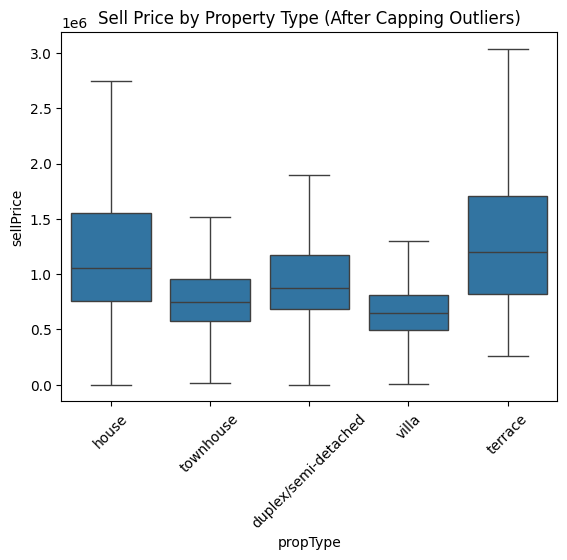

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='propType', y='sellPrice', data=df)
plt.xticks(rotation=45)
plt.title('Sell Price by Property Type (After Capping Outliers)')
plt.show()

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,198954.0,99728.528806,57599.264191,1.0,49845.25,99705.5,149624.75,199504.0
postalCode,198954.0,2196.27145,192.407978,2000.0,2082.0,2144.0,2211.0,2777.0
sellPrice,198954.0,1173194.356766,616200.035129,1.0,720000.0,985500.0,1475000.0,3038750.0
bed,198954.0,3.506268,0.94374,1.0,3.0,3.0,4.0,6.0
bath,198954.0,1.874348,0.819411,1.0,1.0,2.0,2.0,6.0
car,198954.0,1.888039,0.800192,1.0,1.0,2.0,2.0,4.0
month,198954.0,6.778396,3.28847,1.0,4.0,7.0,10.0,12.0
year,198954.0,2014.597731,2.882349,2000.0,2013.0,2015.0,2017.0,2019.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198954 entries, 0 to 199503
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          198954 non-null  int64 
 1   suburb      198954 non-null  object
 2   postalCode  198954 non-null  int64 
 3   sellPrice   198954 non-null  int64 
 4   bed         198954 non-null  Int64 
 5   bath        198954 non-null  Int64 
 6   car         198954 non-null  Int64 
 7   propType    198954 non-null  object
 8   month       198954 non-null  int32 
 9   year        198954 non-null  int32 
dtypes: Int64(3), int32(2), int64(3), object(2)
memory usage: 15.7+ MB


# 📊 Analysis

In this step, the data is aggregated and explored to gain insights into housing trends in Sydney.   
The focus is on understanding how selling price and transaction volume vary over time, location, and property characteristics.

**The analysis aims to answer the following key questions:**
- 🗓️ How have house prices and sales volume changed over the years or months?

- 📍 How does location (e.g., suburb, postal code) influence property prices?

- 🏠 How do property features (such as number of bedrooms, bathrooms, and car spaces) relate to price?

- 💡 What is the best time of year to buy, based on historical trends?

- 🏘️ Which areas offer the best value for money for buyers with different budgets?

- This step sets the foundation for making data-driven recommendations for potential home buyers.

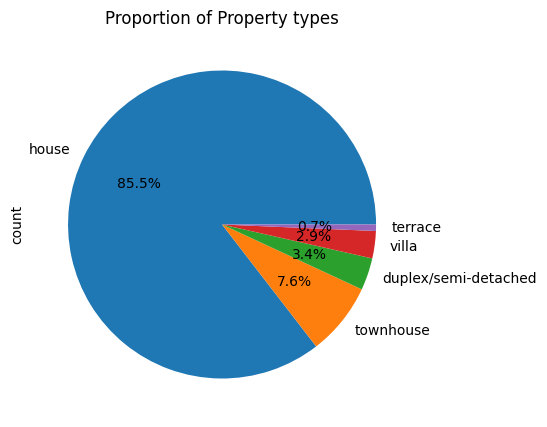

In [34]:
# Proportion of property type sold

df['propType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(5,5),
    title='Proportion of Property types'
)
plt.show()

In [61]:
df.to_csv('output.csv', index=False)

In [35]:
# No.of transaction by year

year_transactions=df.groupby('year').agg({'id':'count','sellPrice':'median'}).reset_index()
year_transactions.columns=['year','Transactions','SellPrice']
print(year_transactions)

    year  Transactions  SellPrice
0   2000             1  2745050.0
1   2001             9   463000.0
2   2002             3   485000.0
3   2003            15   530000.0
4   2004            62   507500.0
5   2005           149   520000.0
6   2006           192   599500.0
7   2007           821   731000.0
8   2008          3905   770000.0
9   2009          8212   765000.0
10  2010          9378   870000.0
11  2011         10498   835000.0
12  2012         11877   825000.0
13  2013         17701   900000.0
14  2014         22912  1000000.0
15  2015         26183  1175000.0
16  2016         26134  1125000.0
17  2017         27975  1180000.0
18  2018         23563  1075000.0
19  2019          9364   925750.0


In [36]:
df['propType_new'] = df['propType'].apply(lambda x: x if x.lower() in ['house', 'townhouse'] else 'other')

In [37]:
df['year'] = df['year'].astype(int)

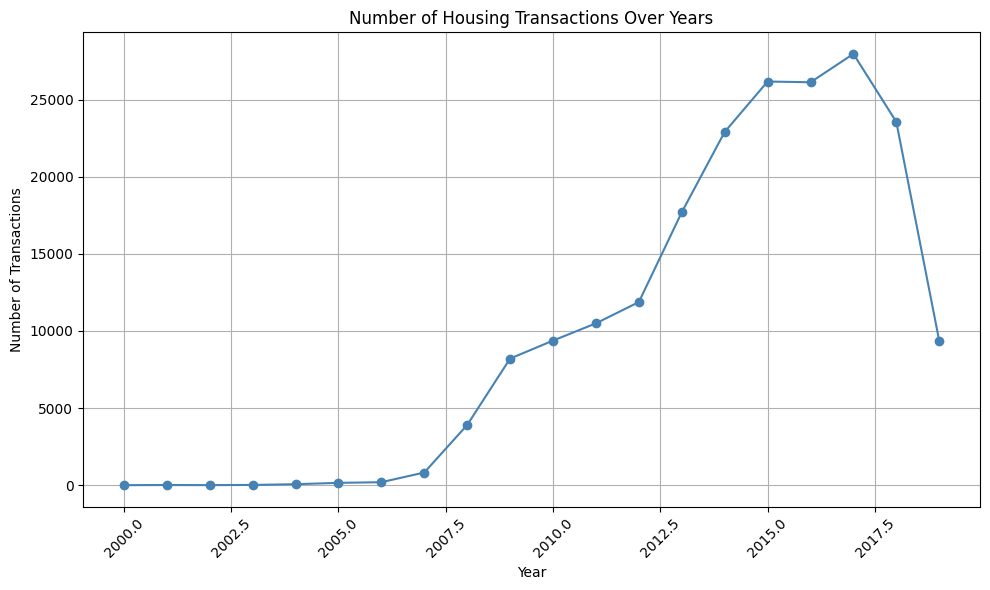

In [38]:
# Group data: count of transactions per year
df['year'] = df['year'].astype(int)
yearly_sales = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='steelblue')
plt.title('Number of Housing Transactions Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

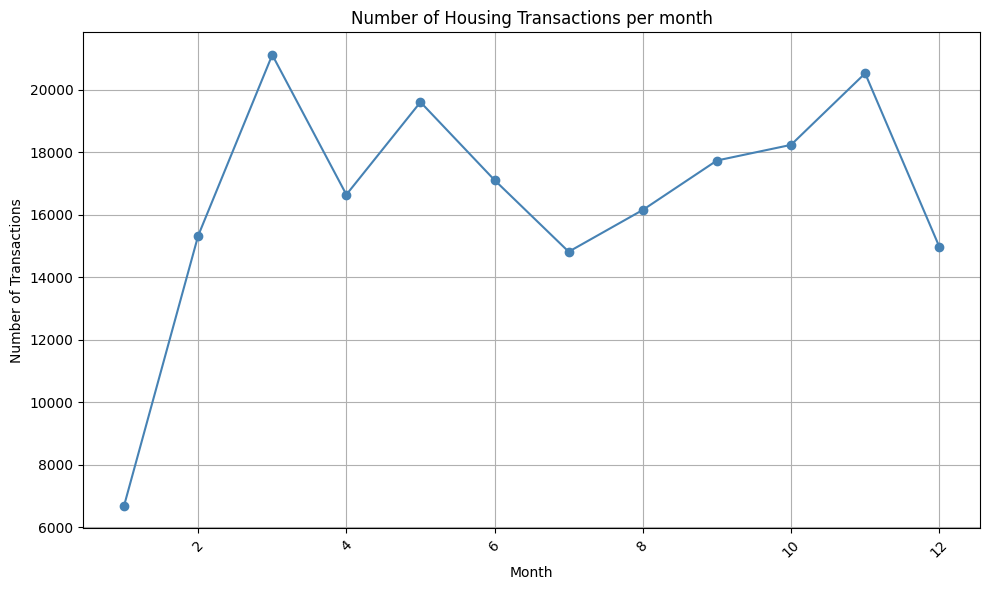

In [39]:
# Group data: count of transactions per month

monthly_sales = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='steelblue')
plt.title('Number of Housing Transactions per month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Findings**
- Sydney’s housing market shows seasonal trends, with the highest activity typically occurring in March, May, and November, while January tends to be the slowest month for transactions.

- Between 2000 and 2019, the market saw significant fluctuations. It peaked in 2017 with 23,865 houses sold, marking the most active period from 2015 to 2017, with over 27,975 transactions each year.

- In 2019, the Australian property market experienced a downturn, with a notable decline in housing transactions, reflecting the broader market slowdown at that time.

In [41]:
# Describing non-numeric features
df.describe(exclude=['int', 'float'])


,suburb,propType,propType_new
count,198954,198954,198954
unique,673,5,3
top,Castle Hill,house,house
freq,1250,170029,170029


In [54]:

df.groupby('suburb')['sellPrice'].mean().sort_values(ascending=False).head(10)


suburb
Milsons Point      2.793333e+06
Collaroy Beach     2.640038e+06
Point Piper        2.639433e+06
Duffys Forest      2.632285e+06
Sackville North    2.550000e+06
Woolwich           2.548223e+06
Darling Point      2.535625e+06
Bellevue Hill      2.518407e+06
Vaucluse           2.494704e+06
Longueville        2.435489e+06
Name: sellPrice, dtype: float64

In [57]:
# SUBURB: median sell price and number of sale transactions group by suburb, order by median price desc.
sb_df = df.groupby('suburb').agg({'sellPrice':'median', 'id':'count'}).reset_index().sort_values(by='sellPrice', ascending=False)
sb_df.columns = ['suburb','medianPrice','transactions']
sb_df

,suburb,medianPrice,transactions
410,Milsons Point,2850000.0,3
626,Watsons Bay,2745050.0,48
501,Point Piper,2745050.0,45
611,Vaucluse,2745050.0,748
642,Whale Beach,2745050.0,58
...,...,...,...
592,Tahmoor,440000.0,847
374,Macquarie Fields,435000.0,1232
34,Bar Point,400000.0,17
666,Yanderra,396000.0,87


In [60]:
# Top 10 suburbs with highest median housing price
sb_t10 = sb_df[:10]
sb_t10['color'] ='#496595'
sb_t10['color'][3:] = '#c6ccd8'
sb_t10

,suburb,medianPrice,transactions,color
410,Milsons Point,2850000.0,3,#496595
626,Watsons Bay,2745050.0,48,#496595
501,Point Piper,2745050.0,45,#496595
611,Vaucluse,2745050.0,748,#c6ccd8
642,Whale Beach,2745050.0,58,#c6ccd8
661,Woolwich,2745050.0,11,#c6ccd8
155,Collaroy Beach,2745050.0,4,#c6ccd8
183,Darling Point,2745050.0,68,#c6ccd8
593,Tamarama,2745050.0,97,#c6ccd8
50,Bellevue Hill,2745050.0,596,#c6ccd8


**CONCLUSION**

The 3 busiest months in Sydney for property transactions seems to be November, May, and March with the latter month being the busiest out of all 12 months. 
On the contrary, January seems to be the month with the least number of properties transactions in Sydney.

Furthermore, March, September and November seems to be the months where transactions of most expensive properties occur. On the other hand, January, July and December seems to be the months where transactions of less expensive properties are likely to occur.


The housing market in Sydney saw gradual increase in the number of transactions from early 2000s to 2017 where it peaked. After 2017, the market saw a sharp decline in number of transactions into 2019. The market was thriving between 2014 and 2018 with number of transactions exceeding 20,000 for each of those years.

From early 2000s till 2005, the prices of properties remained fairly stable. The prices of properties increased by more than 50% from 2005 to 2008. The prices saw a very slight decline in the next year (2009) but in 2010, the prices inclined sharply by almost 13% from 2009. From 2010, the prices fluctuated, to reach all time high in 2015. 2016 saw slight decline in prices but again rose in 2017 with prices smiliar to 2015. From 2017 onwards, the the housing market saw a huge decline to 2019.
The prices of properties tends to decrease with decrease in number of transactions in a year and vice versa.
